In [1]:
import pandas as pd
import numpy as np
pf=pd.read_csv('C:/data science/dataset/heartattack/heart.csv')
pf.head()



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
#fill the null value 
lf=pf.rename(columns={'male':'gender','TenYearCHD':'Target'})
df=lf.fillna({'education':lf.education.mean(),'cigsPerDay':lf.cigsPerDay.mean(),'BPMeds':lf.BPMeds.mean(),'totChol':lf.totChol.mean(),'BMI':lf.BMI.mean(),'heartRate':lf.heartRate.mean(),'glucose':lf.glucose.mean()})
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#check the null value
df.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Target             0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
sns.set_style('darkgrid')

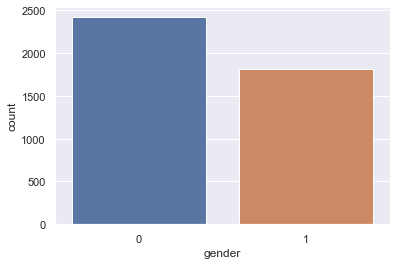

In [5]:

sns.countplot(x='gender',data=df)

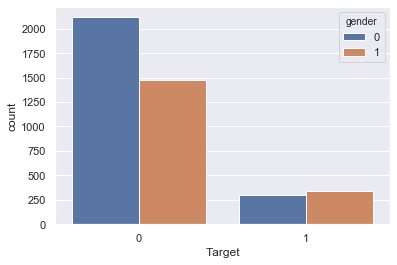

In [6]:
sns.countplot(x='Target',hue='gender',data=df)

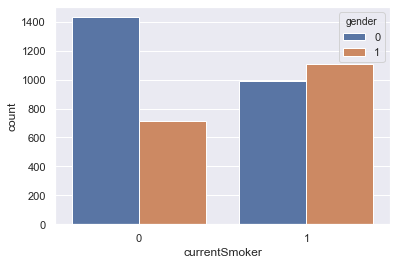

In [7]:
sns.countplot(x='currentSmoker',data=df,hue='gender')

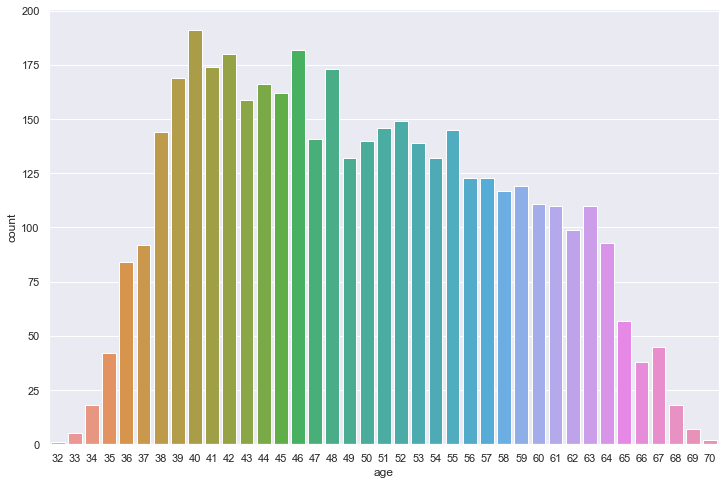

In [8]:
plt.figure(0,figsize=(12,8))
sns.countplot(x='age',data=df)

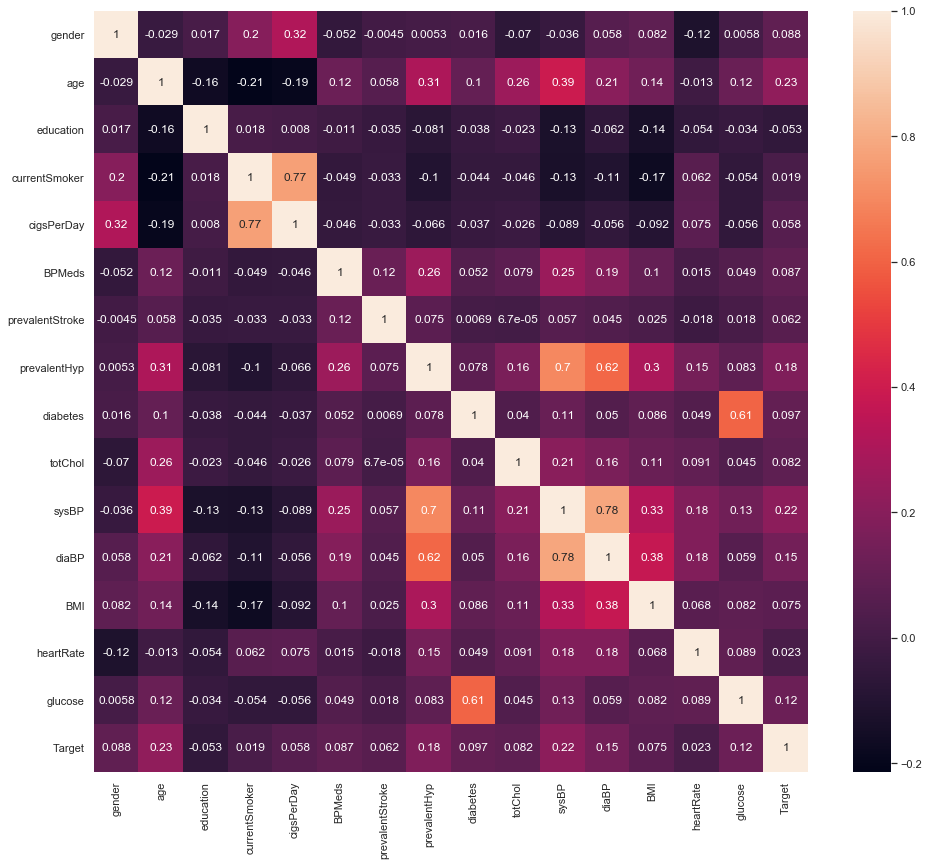

In [9]:
plt.figure(0,figsize=(16,14))
x=df.corr()
feature=x.index


sns.heatmap(df[feature].corr(),annot=True)

C:\Users\naagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022283CDDA88>,
      dtype=object)

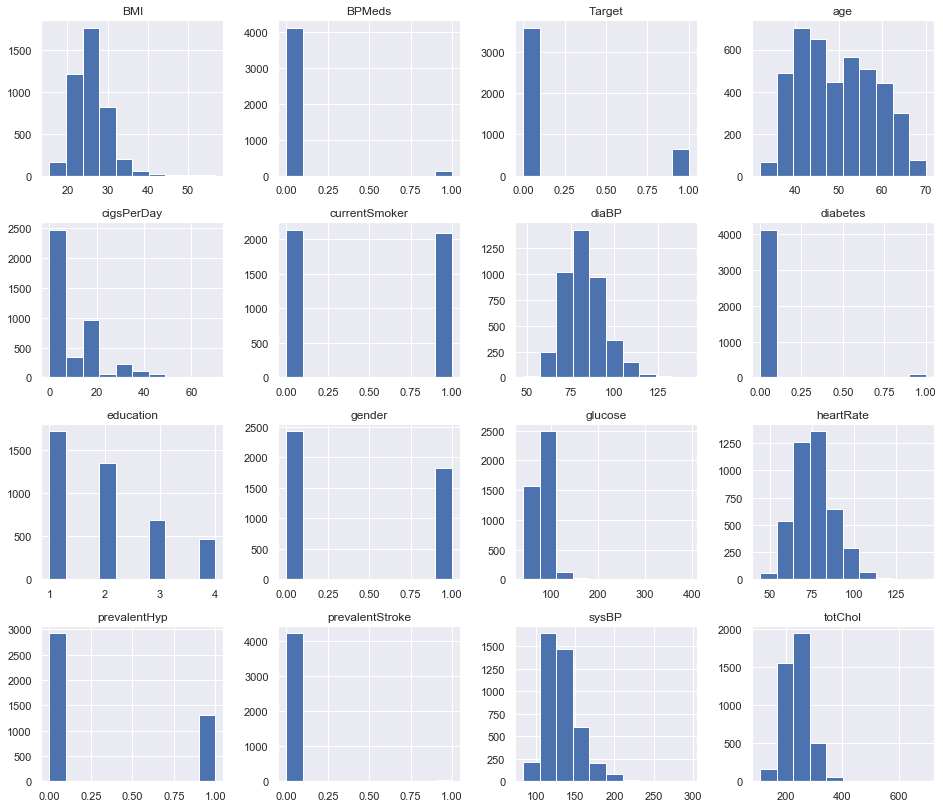

In [10]:
fig=plt.figure(0,figsize=(16,14))
ax = fig.gca()
df.hist(ax=ax)


In [11]:
X_new=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X_new)



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)


In [13]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver='liblinear',max_iter=100)
scores_log=cross_val_score(log,X_new,y,cv=5)
print(scores_log)
score_lr=scores_log.mean()
print(score_lr)

[0.85377358 0.85141509 0.85023585 0.85596222 0.85360094]
0.8529975384821011


In [14]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
scores_log=cross_val_score(knc,X_new,y,cv=5)
print(scores_log)
score_knc_m=scores_log.mean()
print(score_knc_m)


[0.82900943 0.84080189 0.83962264 0.83943329 0.82408501]
0.8345904524292175


In [15]:
#naive_bayes
from sklearn.naive_bayes import BernoulliNB
bn=BernoulliNB()
scores_log=cross_val_score(bn,X_new,y,cv=5)
print(scores_log)
score_bn_m=scores_log.mean()
print(score_bn_m)

[0.84433962 0.8490566  0.85141509 0.84651712 0.85005903]
0.8482774943752645


In [16]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scores_log=cross_val_score(dt,X_new,y,cv=5)
print(scores_log)
score_dt_m=scores_log.mean()
print(score_dt_m)

[0.75117925 0.7629717  0.74410377 0.78158205 0.7390791 ]
0.7557831748011852


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scores_log=cross_val_score(rf,X_new,y,cv=5)
print(scores_log)
score_rd_m=scores_log.mean()
print(score_rd_m)

[0.84551887 0.84787736 0.85141509 0.85242031 0.84769776]
0.8489858769018289


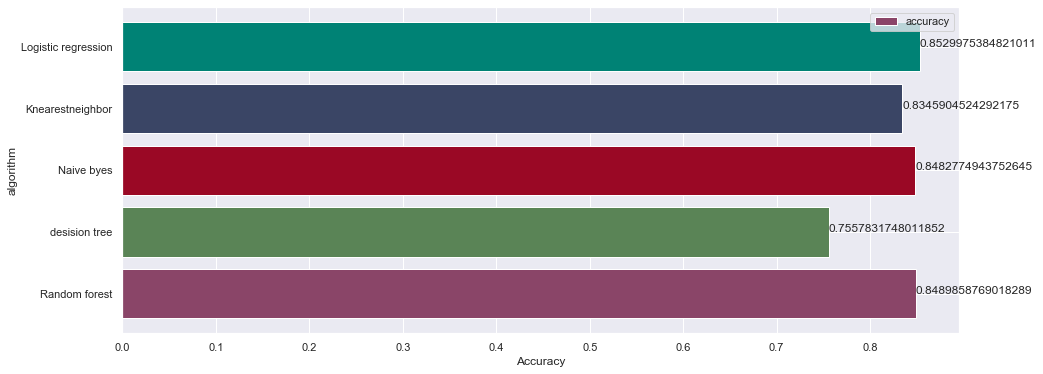

In [18]:
x=['Random forest','desision tree','Naive byes','Knearestneighbor','Logistic regression']
y=[score_rd_m,score_dt_m,score_bn_m,score_knc_m,score_lr]
plt.figure(0,figsize=(15,6))
plt.ylabel('algorithm')
plt.xlabel('Accuracy')
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.barh(x,y,label='accuracy',color = ['#8A4568','#5A8456','#9A0825','#3A4565','#008275'])
plt.legend()


